# Phương pháp số cho phương trình vi phân

Biên soạn: Lê Xuân Trường

## Bài toán Cauchy cho phương trình vi phân cấp 1

Nhiều bài toán trong các lĩnh vực khác nhau có thể được mô hình hoá bởi phương trình vi phân cấp 1 có dạng

$$
    \frac{dy}{dt} = f(t, y), \,\,\, (t_0 < t \leq T)
$$

trong đó $y : [t_0, T] \to \mathbb{R}$ là hàm chưa biết, thoả điều kiện đầu $y(t_0) = y_0$.

#### Định lý:  

Giả sử hàm $f: [t_0, T] \times \mathbb{R} \to \mathbb{R}$ thoả điều kiện

1. liên tục theo cả hai biến

2. liên tục Lipschitz theo biến thứ hai, nghĩa là

$$
    |f(t, \xi_1) - f(t, \xi_2)| \leq K|y_1 - y_2|
$$

với mọi $t \in [t_0, T]$ và mọi $y_1, y_2 \in \mathbb{R}$. Khi đó bài toán Cauchy 

$$
    \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

có nghiệm duy nhất $y = y(t), \,\, t_0 \leq t \leq T$.


## Phương pháp số

### Ý tưởng chung

Khi tìm nghiệm xấp xỉ của bài toán, ta không thể tính $y(t)$ tại mọi giá trị $t \in [t_0, T]$. Thay vào đó ta sẽ tính gần đúng giá trị $y(t)$ tại một lưới rời rạc 

$$
    t_0 < t_1 < \cdots < t_{N-1} < T \equiv T_N.
$$

Thông thường ta sử dụng lưới đều, tức là $t_k - t_{k-1} = h = \displaystyle \frac{T-t_0}{N}$.

Rõ ràng $y(t_0) = y_0$ là giá trị đúng. Giá trị xấp xỉ của $y(t_k)$ sẽ được ký hiệu bởi $y_k$:

$$
    y(t_k) \approx y_k, \quad k = 1, 2, ..., N.
$$

__Sai số khi giải gần đúng phương trình vi phân:__

Khi giải số một phương trình vi phân, sai số có thể xuất phát từ hai nguồn chính sau đây:

1. Sai số làm tròn (rounding errors) xuất hiện khi thực hiện các phép toán số học trên các số thực dấu phẩy động

2. Sai số phương pháp (truncation errors) gây ra do phương pháp xấp xỉ.

Trong khi sai số làm tròn khó được kiểm soát (bởi nó còn phụ thuộc vào phần cứng máy tính) thì ta có thể hiệu chỉnh và cải tiến sai số phương pháp. 

Với một sơ đồ số, sai số (phương pháp) tuyệt đối được đo lường bới

$$
    \varepsilon = \max\{|y(t_k) - y_k| : k = 1, 2, ..., N\}.
$$

### Phương pháp Euler 

__Giả thiết:__ Phương trình vi phân $\displaystyle \frac{dy}{dt} = f(t, y)$ xác định tại từng điểm $t_k$ của lưới

$$
    \frac{dy}{dt}(t_k) = f(t_k, y(t_k)), \quad k = 0, 1, ..., N.
$$

__Công thức lặp:__ (xấp xỉ đạo hàm bằng sai phân tiến bậc 1)

$$
    y_{k+1} \approx y_k + hf(t_k, y_k), \quad k = 0, 1, ..., N-1.
$$

### Cài đặt thuật toán Euler trên Python

In [5]:
import numpy as np

In [6]:
def fw_euler(f, t_0, t_N, h, iv):
    grid_of_times = np.arange(t_0, t_N + h, h)
    y = np.zeros(len(grid_of_times))
    y[0] = iv
    for k in range(1,len(grid_of_times)):
        y[k] = y[k-1] + h*f(grid_of_times[k-1], y[k-1])
    return grid_of_times, y

##### Áp dụng hàm được định nghĩa ở trên để tìm nghiệm xấp xỉ của bài toán

$$
    \frac{dy}{dt} = 0.1y, \,\, y(0) = 100
$$

trên khoảng [0, 20]

In [7]:
def func(t,x):
    return 0.1*x

In [8]:
t, y = fw_euler(func, 0, 20, 0.5, 100)

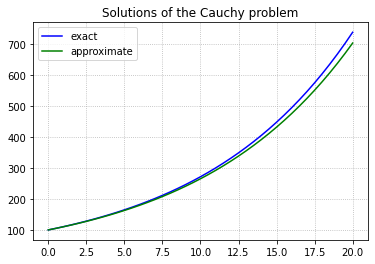

In [9]:
import matplotlib.pyplot as plt

# Plot exact solution
plt.plot(t, 100*(np.exp(0.1*t)),'b', label = 'exact')

# Plot approximate solution
plt.plot(t, y, 'g-', label = 'approximate')

plt.legend()
plt.grid(True,linestyle=':')
plt.title('Solutions of the Cauchy problem')
plt.xlabel = ('t')
plt.ylabel = ('y')
plt.show()

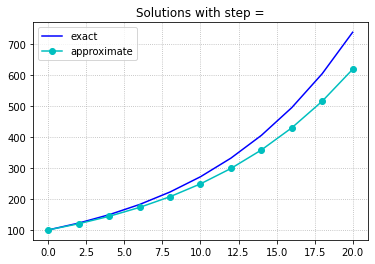

In [10]:
t1, y1 = fw_euler(func, 0, 20, 2, 100)

# Plot exact solution
plt.plot(t1, 100*(np.exp(0.1*t1)),'b', label = 'exact')

# Plot approximate solution
plt.plot(t1, y1, 'c', label = 'approximate', marker = 'o')

plt.legend()
plt.grid(True,linestyle=':')
plt.title('Solutions with step =')
plt.xlabel = ('t')
plt.ylabel = ('y')

plt.show()

#### Phương pháp Runge-Kutta 

__Giả thiết:__ Phương trình vi phân $\displaystyle \frac{dy}{dt} = f(t, y)$ xác định tại từng điểm $t_k$ của lưới

$$
    \frac{dy}{dt}(t_k) = f(t_k, y(t_k)), \quad k = 0, 1, ..., N.
$$

__Công thức Runge-Kutta bậc hai:__ 

$$
    y_{k+1} = y_k + hf\big(t_k +\frac{1}{2}h, y_k + \frac{1}{2}f(t_k, y_k)\big), \quad k = 0, 1, ..., N-1.
$$

__Công thức Runge-Kutta bậc bốn:__ $\,\,$ là một trong những phương pháp một bước nổi tiếng nhất để giải ODEs.

$$
    y_{k+1} = y_k + \frac{h}{6}\big(z^1_k + 2z_k^2 + 2z_k^3 + z_k^4\big), \quad k = 0, 1, ..., N-1.
$$

trong đó

$$
    z^1_k = f(t_k, y_k)
$$

$$
    z_k^2 = f\big(t_k + \frac{1}{2}h, y_k + \frac{1}{2}z_k^1\big)
$$

$$
    z_k^3 = f\big(t_k + \frac{1}{2}h, y_k + \frac{1}{2}z_k^2\big)
$$

$$
    z_k^4 = f\big(t_k + h, y_k + z_k^3\big)
$$

### Cài đặt thuật toán -Kutta bậc 4 trên Python

In [15]:
import numpy as np
def rk4(f, t_0, t_N, h, iv):
    grid_of_times = np.arange(t_0, t_N + h, h)
    y = np.zeros(len(grid_of_times))
    y[0] = iv
    for k in range(1,len(grid_of_times)):
        z1 = f(grid_of_times[k-1], y[k-1])
        z2 = f(grid_of_times[k-1] + h/2, y[k-1] + z1/2)
        z3 = f(grid_of_times[k-1] + h/2, y[k-1] + z2/2)
        z4 = f(grid_of_times[k-1] + h, y[k-1] + z3)
        y[k] = y[k-1] + h*(z1 + 2*z2 + 2*z3 + z4)/6
    return grid_of_times, y

In [16]:
def func(t,x):
    return 0.1*x

In [19]:
t, y = rk4(func, 0, 20, 2, 100)

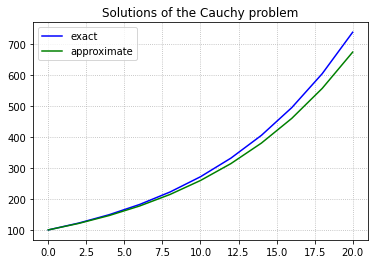

In [20]:
import matplotlib.pyplot as plt

# Plot exact solution
plt.plot(t, 100*(np.exp(0.1*t)),'b', label = 'exact')

# Plot approximate solution
plt.plot(t, y, 'g-', label = 'approximate')

plt.legend()
plt.grid(True,linestyle=':')
plt.title('Solutions of the Cauchy problem')
plt.xlabel = ('t')
plt.ylabel = ('y')
plt.show()

## Phân tích sai số

Một đặc điểm quan trọng của một phương pháp số cụ thể nào đó liên quan đến sai số phương pháp là __sự hội tụ__. 

#### Định ngĩa:

Một sơ đồ số cho bài toán Cauchy

$$
    \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

được gọi là hội tụ nếu

$$
    \max\{|y(t_k) - y_k| : k = 1, 2, ..., N\} \to 0 \quad \text{khi $N \to \infty$}.
$$

Khi một phương pháp số là hội tụ thì ta còn quan tâm đến tốc độ hội tụ của phương pháp đó. Tốc độ hội tụ (the rate of convergence), hay còn gọi là độ chính xác toàn cục (the global order of accuracy), được định nghĩa như sau:

#### Định ngĩa:

Ta nói một phương pháp có tốc độ hội tụ bậc $p$ nếu 

$$
    \max\{|y(t_k) - y_k| : k = 1, 2, ..., N\} \leq \mathcal{O}(h^p)
$$

khi $h \to 0$ (hoặc $N \to \infty$).

### Sai số của phương pháp Euler

Áp dụng công thức khai triển Taylor ta có

$$
    y(t_{k+1}) = y(t_k) + h\frac{dy}{dt}(t_k) + \frac{h^2}{2}\frac{d^2y}{dt^2}(\xi_k),
$$

trong đó $t_k \leq \xi_k \leq t_{k+1}$. Do $y$ là nghiệm của phương trình vi phân nên ta suy ra

$$
    y(t_{k+1}) = y(t_k) + hf(t_k, y(t_k)) + \frac{h^2}{2}\frac{d^2y}{dt^2}(\xi_k).
$$

$$
    y_{k+1} = y_k + hf(t_k, y_k)
$$

Mặc khác từ công thức của sơ đồ Euler tiến, ta có

$$
    y(t_{k+1}) - y_{k+1} = y(t_k) - y_k + h\left[f(t_k, y(t_k)) - f(t_k, y_k)\right] + \frac{h^2}{2}\frac{d^2y}{dt^2}(\xi_k).
$$

Ta có nhận xét rằng sai số của $y(t_{k+1})$ bao gồm hai phần

* Phần cắt bớt (trunction): $T_{k+1} := \displaystyle \frac{h^2}{2}\frac{d^2y}{dt^2}(\xi_k)$ 


* Phần sai số lan truyền (propagated error)

$$
    y(t_k) - y_k + h\left[f(t_k, y(t_k)) - f(t_k, y_k)\right].
$$

Đặt $e_k = y(t_k) - y_k$, $(k = 1, 2, ...)$. Từ đẳng thức trên ta suy ra 

$$
    e_{k+1} = e_k + h\left[f(t_k, y(t_k)) - f(t_k, y_k)\right] + T_{k+1}.
$$

Nếu giả sử thêm rằng hàm $f$ thoả điều kiện Lipschitz theo biến thứ hai và nghiệm $y$ có đạo hàm cấp hai bị chặn thì 

$$
    |e_{k+1}| \leq \big(1 + hL\big)|e_k| + h\tau(h),
$$

trong đó $L$ là hằng số Lipschitz và

$$
    \tau(h) = \displaystyle \max\limits_{t_0 \leq t \leq N}\frac{h}{2}\left|\frac{d^2y}{dt^2}(t)\right|.
$$

Điều này có thể dẫn đến kết quả sau


__Định lý:__ Giả sử $f$ là hàm số thoả một số điều kiện (_liên tục, Lipschitz theo biến thứ hai_) và nghiệm $y$ có đạo hàm cấp hai bị chặn. Khi đó ta có đánh giá

$$
    \max\{|y(t_k) - y_k| : k = 1, 2, ..., N\} \leq C.h
$$

### Sai số của công thức Runge-Kutta

Để phân tích sai số của phương pháp Runge-Kutta bậc hai ta áp dụng khai triển Taylor và thu được

$$
    y(t_{k+1}) = y(t_k) + hy'(t_k) + \frac{h^2}{2}y''(t_k) + \mathcal{O}(h^3). 
$$

Do $y$ là nghiệm của phương trình vi phân nên suy ra

$$
    y(t_{k+1}) = y(t_k) + hf(t_k, y(t_k)) + \frac{h^2}{2}y''(t_k) + \mathcal{O}(h^3) = y(t_k) + h.F(t_k, y(t_k); h) + \mathcal{O}(h^3),
$$

trong đó $F(t_k, y(t_k); h) = \displaystyle f(t_k, y(t_k)) + \frac{h}{2}\left(\partial_tf(t_k, y(t_k)) + \partial_yf(t_k, y(t_k)).f(t_k, y(t_k))\right)$. 

Với công thức Runge-Kutta bậc hai ta muốn biểu diễn hàm $F$ dưới dạng

$$
    F(t, y; h) = af(t, y) + bf(t + \alpha h, y + \beta h f(t, y)).
$$

Để xác định các hằng số $a, b$ và $\alpha, \beta$ ta lưu ý rằng

$$
    f(t_k + \alpha h, y(t_k) + \beta h f(t_k, y(t_k))) = f(t_k, y(t_k)) + \alpha\partial_tf(t_k,y(t_k)).h + \beta\partial_yf(t_k, y(t_k)).hf(t_k,y(t_k)) + \mathcal{O}(h^2)
$$

Từ các đẳng thức trên, có thể thấy rằng các hằng số $a, b, \alpha, \beta$ thoả mãn các phương trình sau

$$
    \begin{cases} a + b = 1 \\ \alpha b = 1/2 \\ b\beta = 1/2\end{cases}
$$

Nếu chọn ta suy ra

$$
    y(t_{k+1}) = y(t_k) + hf(t_k + \frac{h}{2}, y(t_k) + \frac{h}{2}f(t_k, y(t_k))) + \mathcal{O}(h^3) \approx y_{k+1}
$$

Sai số chặt cụt của phương pháp là

$$
    T_{k+1} = y(t_{k+1}) - y_{k+1} = \mathcal{O}(h^3).
$$

Với các tính toán tương tự nhưng phức tạp hơn ta thu được sai số của __phương pháp Runge-Kutta bậc bốn__

$$
    T_{k+1} = y(t_{k+1}) - y_{k+1} = \mathcal{O}(h^5).
$$

Đây là các sai số địa phương. Đối với sai số toàn cục, ta có kết quả sau

__Định lý:__ Với một số điệu kiện của hàm $f$ và nghiệm $y$ ta có

* $\max\{|y(t_k) - y_k| : k = 1, 2, ..., N\} \leq C.h^2$ đối với phương pháp Runge-Kutta bậc hai


* $\max\{|y(t_k) - y_k| : k = 1, 2, ..., N\} \leq C.h^4$ đối với phương pháp Runge-Kutta bậc 


## Mô hình lan truyền dịch bệnh

Tổng thể được phân thành ba nhóm

* Nhóm cá thể nhạy cảm có khả năng nhiễm bệnh, ký hiệu là $S$. Ký hiệu $S(t)$ là số cá thể có khả năng nhiễm bệnh tại thời điểm $t$. 

* Nhóm bị nhiễm bệnh, ký hiệu là $I$. Gọi $I(t)$ là số cá thể thuộc nhóm $I$.

* Một cá nhân bị nhiễm bệnh có hai khả năng: hoặc là hồi phục và đạt được miễn nhiễm, hoặc là chết đi. Nhóm các cá thể thuộc hai dạng này được ký hiệu bởi $R$. Gọi $R(t)$ là số người thuộc nhóm $R$.

Sự biến động của dịch bệnh có thể hình dung như sơ đồ sau

![](sir.png)

Ta có thể sử dụng toán học để mô tả sự thay đổi về số lượng của các nhóm $S, I, R$. Cụ thể hơn $S(t)$, $I(t)$ và $R(t)$ thoả mãn hệ phương trình vi phân 

$$
    \begin{cases} S' = -\beta SI \\ I' = \beta SI - \gamma I \\ R' = \gamma I\end{cases} 
$$

trong đó

* $\beta$ là một thông số phản ánh mức độ dễ dàng của để một người bị nhiễm trong một đơn vị thời gian 

    * Giả sử quan sát $n$ cuộc gặp gỡ giữa một cá thể nhóm $S$ với một cá thể nhóm $I$ thì thấy có $m$ cá thể nhóm $S$ bị lây nhiễm nhiễm bệnh. Xác suất lây nhiễm sẽ đối với mỗi cuộc tiếp xúc sẽ là là $p = m/n$. 
    
    * Gọi $\mu$ là kỳ vọng về số cuộc gặp gỡ giữa một người nhóm $S$ với một người nhóm $I$
    
    * Khi đó ta có $\beta = \mu.p$

* $\gamma$ là xác suất để một người trong nhóm $I$ chuyển sang nhóm $R$ trong một đơn vị thời gian 

$$
    \gamma = \frac{\text{số người chuyển sang nhóm $R$ trong khoảng thời gian $T$}}{T\times \text{số người bệnh trong thời gian $T$}}
$$

#### Giải hệ phương trình truyền nhiễm bằng phương pháp Euler

Ta có thể xem hệ trên như một phương trình vi phân cấp một nhận giá trị véctơ

$$
    y'(t) = f(t, y(t)), \quad 0 \leq t \leq T,
$$

trong đó $y(t) = \displaystyle \begin{bmatrix} S(t) \\ I(t) \\ R(t) \end{bmatrix}$ và $f(t, y) = \displaystyle \begin{bmatrix} -\beta S(t)I(t) \\ \beta S(t)I(t) - \gamma I(t) \\ \gamma I(t) \end{bmatrix}$.

Công thức Euler cho hệ phương trình này như sau

$$
    y_0 = y(0) = \displaystyle \begin{bmatrix} S(0) \\ I(0) \\ R(0) \end{bmatrix} \,\, \text{cho trước}
$$

Với $k = 1, 2, ....$ ta có

$$
    y_k = y_{k-1} + hf(t_{k-1}, y_{k-1}) 
$$

hay dưới dạng véctơ ta có

$$
    \begin{bmatrix} S(t_k) \\ I(t_k) \\ R(t_k) \end{bmatrix} = \begin{bmatrix} S(t_{k-1}) \\ I(t_{k-1}) \\ R(t_{k-1}) \end{bmatrix} + h*\begin{bmatrix} -\beta S(t_{k-1})I(t_{k-1}) \\ \beta S(t_{k-1})I(t_{k-1}) - \gamma I(t_{k-1}) \\ \gamma I(t_{k-1}) \end{bmatrix}
$$

__Ví dụ:__ Nghiên cứu sự lan truyền của bệnh cúm trong trường học người ta thu được các thông tin sau

* Tại thời điểm quan sát có 40 người thuộc nhóm nhạy cảm và 8 người thuộc nhóm bị nhiễm. Sau 24 giờ các số này lần lượt là 30 và 18. Nếu lấy đơn vị thời gian là 1 giờ thì ta có hệ số $\beta = 10/(40.8.24)$.

* Trong số 15 người bị nhiễm thì sau một ngày có 3 người chuyển sang nhóm thứ ba (nhóm $R$). Khi đó $\gamma = 3/(15.24)$

Sử dụng các thông tin này để áp dụng cho một một đợt cúm mới. Ở thời điểm phát hiện đợt cúm này có 1 người bị nhiễm và 50 người nhạy cảm. Đánh giá mức độ lan truyền của dịch trong vòng 30 ngày tới. 

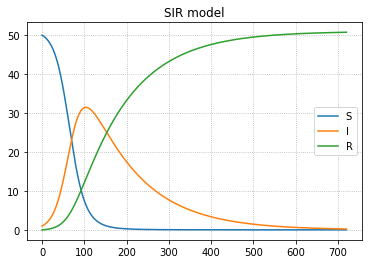

In [3]:
import numpy as np
from numpy import zeros, linspace
import matplotlib.pyplot as plt

# Time unit: 1 h
beta= 10./(40*8*24)
gamma= 3./(15*24)
h = 0.1                    # 6 min
D=30                       # Simulate for D days
N_t = int(D*24/h)         # Corresponding no of hours
t=linspace(0,N_t*h,N_t+1)
S=zeros(N_t+1)
I=zeros(N_t+1)
R=zeros(N_t+1)

# Initial condition

S[0]=50
I[0]=1
R[0]=0

# Step equations forward in time

for n in range(N_t):
    S[n+1] =S[n]-h*beta*S[n]*I[n]
    I[n+1] =I[n]+h*beta*S[n]*I[n]-h*gamma*I[n]
    R[n+1] =R[n]+h*gamma*I[n]
    
plt.plot(t, S, label='S')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.legend()
plt.grid(True,linestyle=':')
plt.title('SIR model')
plt.show()

#plt.savefig(’tmp.pdf’)
#plt.savefig(’tmp.png’)